## 1. ETL

In [69]:
#import stuffs
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [70]:
df = pd.read_csv("../data/income.csv")

In [71]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30000 non-null  int64 
 1   sex             30000 non-null  object
 2   education       30000 non-null  object
 3   education-num   30000 non-null  int64 
 4   marital-status  30000 non-null  object
 5   workclass       30000 non-null  object
 6   occupation      30000 non-null  object
 7   hours-per-week  30000 non-null  int64 
 8   income          30000 non-null  object
 9   label           30000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


In [73]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

In [74]:
df['label'].value_counts(normalize=True)

0    0.723333
1    0.276667
Name: label, dtype: float64

## 2. EDA

In [75]:
df['education-num'].unique()

array([ 9, 14, 15,  7,  8,  3, 10, 13, 12,  5, 11,  6,  4, 16])

In [76]:
df['hours-per-week'].unique()

array([40, 50, 20, 57, 36, 55, 22, 70, 45, 80, 56, 35, 30, 42, 60, 43, 52,
       48, 25, 37, 38, 24, 46, 27, 44, 65, 32, 84, 39, 47, 49, 76, 59, 66,
       62, 28, 75, 68, 33, 26, 58, 23, 64, 41, 72, 34, 54, 63, 53, 31, 21,
       29, 67, 78, 51, 61, 74, 77, 73, 90])

In [77]:
df['occupation'].unique()

array(['Craft-repair', 'Exec-managerial', 'Prof-specialty',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Adm-clerical', 'Other-service', 'Sales', 'Tech-support',
       'Protective-serv', 'Transport-moving'], dtype=object)

## 4. Feature Extraction

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30000 non-null  int64 
 1   sex             30000 non-null  object
 2   education       30000 non-null  object
 3   education-num   30000 non-null  int64 
 4   marital-status  30000 non-null  object
 5   workclass       30000 non-null  object
 6   occupation      30000 non-null  object
 7   hours-per-week  30000 non-null  int64 
 8   income          30000 non-null  object
 9   label           30000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


In [79]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [80]:
#columns name
cat_cols  = ['sex', 'education-num', 'marital-status',
       'workclass', 'occupation']
cont_cols = ['age', 'hours-per-week'] 
y         = ['label']

In [81]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [82]:
df['education-num'].cat.categories

Int64Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [83]:
df['education-num'].cat.codes

0         6
1        11
2         6
3        12
4         4
         ..
29995    11
29996     6
29997    12
29998     7
29999     9
Length: 30000, dtype: int8

In [84]:
df['education-num'].cat.codes.values

array([ 6, 11,  6, ..., 12,  7,  9], dtype=int8)

## 5. Cleaning

In [85]:
df.isna().sum()

age               0
sex               0
education         0
education-num     0
marital-status    0
workclass         0
occupation        0
hours-per-week    0
income            0
label             0
dtype: int64

## 6. Define X and y

In [86]:
cat_cols

['sex', 'education-num', 'marital-status', 'workclass', 'occupation']

In [87]:
#stack categorical columns as one vector as one vector

sex   = df['sex'].cat.codes.values
education_num = df['education-num'].cat.codes.values
marita_status  = df['marital-status'].cat.codes.values
workclass  = df['workclass'].cat.codes.values
occupation  = df['occupation'].cat.codes.values

cat_features = np.stack([sex, education_num, marita_status, workclass, occupation], 1)

cat_features[:3]

array([[ 1,  6,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1,  6,  0,  3,  7]], dtype=int8)

In [88]:
cat_features.shape

(30000, 5)

In [89]:
#convert cat_features numpy into tensor
cat_features = torch.tensor(cat_features, dtype=torch.int64)
cat_features[:3]

tensor([[ 1,  6,  3,  2,  1],
        [ 1, 11,  1,  1,  2],
        [ 1,  6,  0,  3,  7]])

In [90]:
cont_cols

['age', 'hours-per-week']

In [91]:
#similarly, we want to stack continuous features into a vector of size 2
age  = df['age'].values  #.values give you the numpy vector
hr_per_week  = df['hours-per-week'].values
#use list comprehension
#[df[col].values for col in cont_cols]

conts = np.stack([age, hr_per_week], 1)

#turn this into tensor...
conts = torch.tensor(conts, dtype=torch.float32)

conts[:4]

tensor([[27., 40.],
        [47., 50.],
        [59., 20.],
        [38., 57.]])

In [92]:
conts.shape  #(120000, 6)

torch.Size([30000, 2])

In [93]:
#finally, we need the y, to be in tensor
y = torch.tensor(df[y].values).flatten()  #reshape(-1)
y.shape

torch.Size([30000])

## 7. Determine the embedding size

- Before we create the embedding, we need to specify the embedding size....
- Two ways:  
  - randomly pick a size
    - min(50, unique/2)
  - specify a size

In [94]:
#get the size of all my categorical cols
cat_size = [len(df[col].cat.categories) for col in cat_cols]
cat_size

[2, 14, 6, 5, 12]

In [95]:
emb_size = [(size, min(50, size//2)) for size in cat_size]
emb_size

[(2, 1), (14, 7), (6, 3), (5, 2), (12, 6)]

## 8. Try to illustrate how Embedding layer works

In [96]:
twosamples = cat_features[:2]
twosamples

tensor([[ 1,  6,  3,  2,  1],
        [ 1, 11,  1,  1,  2]])

In [97]:
#emb_size: [(2, 1), (14, 7), (6, 3), (5, 2), (12, 6)]
#but pyTorch does not have a list of nn.Embedding
#if you want pyTorch to have a list of layers, use nn.ModuleList
embed_layer = nn.ModuleList([nn.Embedding(unique, emb_s) for unique, emb_s in emb_size])

In [98]:
embed_layer

ModuleList(
  (0): Embedding(2, 1)
  (1): Embedding(14, 7)
  (2): Embedding(6, 3)
  (3): Embedding(5, 2)
  (4): Embedding(12, 6)
)

In [99]:
#empty embedding
sample_embedding = []

for i, e in enumerate(embed_layer):
    sample_embedding.append(e(twosamples[:, i])) #apply embedding layer to column i
                                                 #apply embedding layer 0 to column 0

In [100]:
sample_embedding

[tensor([[0.1061],
         [0.1061]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.4489, -1.2064,  0.0578, -0.1468, -0.6605, -0.1660,  1.7931],
         [-0.9107,  1.3664, -1.2766,  1.1210,  0.5082,  0.4616,  0.6802]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0919,  0.0391,  0.7280],
         [-1.7288,  0.9880, -0.2659]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.9005,  0.2642],
         [-0.7888,  1.2407]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.1816, -1.1464, -2.1736, -1.8866, -1.1849,  1.8959],
         [-0.8705,  0.1520,  0.4691, -1.6421,  0.8317, -0.7410]],
        grad_fn=<EmbeddingBackward0>)]

In [101]:
# in coding, we want to concat all these embeddings, into one vector
final_embedding = torch.cat(sample_embedding, 1)

final_embedding

tensor([[ 0.1061,  0.4489, -1.2064,  0.0578, -0.1468, -0.6605, -0.1660,  1.7931,
         -0.0919,  0.0391,  0.7280, -0.9005,  0.2642, -1.1816, -1.1464, -2.1736,
         -1.8866, -1.1849,  1.8959],
        [ 0.1061, -0.9107,  1.3664, -1.2766,  1.1210,  0.5082,  0.4616,  0.6802,
         -1.7288,  0.9880, -0.2659, -0.7888,  1.2407, -0.8705,  0.1520,  0.4691,
         -1.6421,  0.8317, -0.7410]], grad_fn=<CatBackward0>)

In [102]:
#gonna teach you very briefly about nn.Dropout
#define a dropout layer
dl = nn.Dropout(0.5)

In [103]:
final_embedding = dl(final_embedding)
final_embedding

tensor([[ 0.2123,  0.0000, -0.0000,  0.1156, -0.0000, -1.3209, -0.0000,  0.0000,
         -0.0000,  0.0000,  0.0000, -1.8011,  0.0000, -0.0000, -0.0000, -0.0000,
         -3.7732, -0.0000,  0.0000],
        [ 0.0000, -1.8214,  0.0000, -2.5531,  0.0000,  0.0000,  0.9232,  0.0000,
         -3.4576,  1.9760, -0.5319, -0.0000,  2.4815, -1.7410,  0.0000,  0.9382,
         -3.2843,  1.6634, -1.4819]], grad_fn=<MulBackward0>)

In [111]:
final_embedding.shape

torch.Size([2, 19])

## 9. Define the model

In [107]:
sample_cont = conts[:5]
sample_cont

tensor([[27., 40.],
        [47., 50.],
        [59., 20.],
        [38., 57.],
        [64., 40.]])

In [108]:
batch_norm1d = nn.BatchNorm1d(2)

In [109]:
output = batch_norm1d(sample_cont)
output

tensor([[-1.4793e+00, -1.1215e-01],
        [-1.0431e-07,  6.8890e-01],
        [ 8.8755e-01, -1.7143e+00],
        [-6.6566e-01,  1.2496e+00],
        [ 1.2574e+00, -1.1215e-01]], grad_fn=<NativeBatchNormBackward0>)

In [110]:
conts.shape

torch.Size([30000, 2])

In [ ]:
#cat_embedding (30000, 19)
#cont          (30000, 2)

In [112]:
class Income_Classification_NN(nn.Module):
    
    def __init__(self, emb_size, cont_size, out_size, layer_size = [200, 100], p=0.5):
        super().__init__()
        self.embed_layer = nn.ModuleList([nn.Embedding(unique, emb_s) for unique, emb_s in emb_size])
        self.dropout     = nn.Dropout(p)
        self.batchnorm1d = nn.BatchNorm1d(cont_size)
        
        #calculate input_size
        cat_size = sum(emb_s for _, emb_s in emb_size)
        input_size = cat_size + cont_size
        
        #linear(input_size, 200) -> relu -> batchnorm -> dropout
        #linear(200, 100) -> relu -> batchnorm -> dropout
        #linear(100, out_size)
        layerlist = []
        for i in layer_size:
            layerlist.append(nn.Linear(input_size, i))  #(input_size, 200)
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            input_size = i
        layerlist.append(nn.Linear(layer_size[-1], out_size))
        
        self.layers = nn.Sequential(*layerlist)
            
    def forward(self, x_cat, x_cont):
        #x_cat:  (30000, 19)
        #x_cont: (30000, 2)
        embeddings = []
        for i, e in enumerate(self.embed_layer):
            embeddings.append(e(x_cat[:, i]))
        x = torch.cat(embeddings, 1)  
        #x: (30000, 19)
        x = self.dropout(x)
        
        x_cont = self.batchnorm1d(x_cont)  
        #x_cont: (30000, 2)
        
        x = torch.cat([x, x_cont], 1)
        #x: (30000, 21)
        
        x = self.layers(x)
        
        return x

In [113]:
model = Income_Classification_NN(emb_size, conts.shape[1], len(y.unique()))

## 10. Training!!!

In [114]:
#define loss function 
J_fn = nn.CrossEntropyLoss()

In [115]:
#define optimizer (you can try use Adam)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
#Adam have dynamic learning schedules....
#but it is NOT proven that Adam is better than SGD....

In [116]:
y.shape

torch.Size([30000])

In [119]:
30000 * 0.3

9000.0

In [122]:
#conts

tensor([[27., 40.],
        [47., 50.],
        [59., 20.],
        ...,
        [47., 55.],
        [32., 40.],
        [33., 60.]])

In [123]:
#why you not use 120000, too lazy to wait
#why you don't use dataloader, because our data is small, only 9 features....

#train test split
train_size = 21000
test_size  = 9000

#use your numpy indexing technique
cat_train = cat_features[:train_size]
cat_test  = cat_features[train_size:test_size+train_size]
con_train = conts[:train_size]
con_test  = conts[train_size:test_size+train_size]
y_train   = y[:train_size]
y_test    = y[train_size:test_size+train_size]

In [124]:
epochs = 100

losses = []

for i in range(epochs):
    yhat = model(cat_train, con_train)
    loss = J_fn(yhat, y_train)
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 25 == 1:
        print(f"Epoch: {i}; Loss: {loss:.2f}")

Epoch: 1; Loss: 0.81
Epoch: 26; Loss: 0.37
Epoch: 51; Loss: 0.31
Epoch: 76; Loss: 0.29


In [126]:
train_loss = [loss.item() for loss in losses]

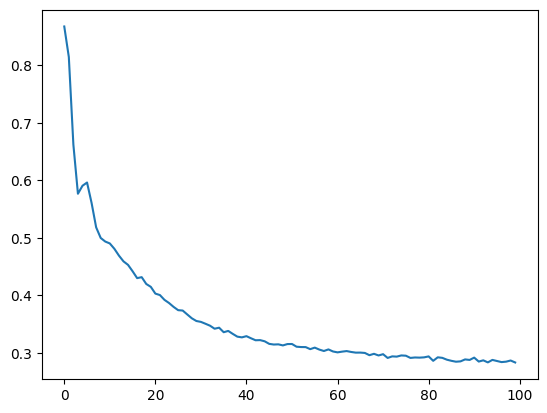

In [127]:
plt.plot(range(epochs), train_loss)

# 12. Testing/Inference

In [128]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    yhat = model(cat_test, con_test)
    loss = J_fn(yhat, y_test)
    predicted = torch.max(yhat, 1)[1]
    acc  = accuracy_score(predicted, y_test)
    
print(acc)

0.8628888888888889
